# Carregando as bibliotecas

In [1]:
!pip install seaborn
import pandas as pd # Pandas para carregamento do conjunto de dados

In [2]:
from sklearn.preprocessing import LabelEncoder # Usada para codificação das categorias em números

In [3]:
# Algoritmos usados para treinamento e predição

from sklearn.tree import DecisionTreeClassifier        # Árvore de Decisão
from sklearn.ensemble import RandomForestClassifier    # Floresta Aleatória
from sklearn.neighbors import KNeighborsClassifier     # KNN
from sklearn.svm import SVC                            # SVM
from sklearn.naive_bayes import GaussianNB             # Naive Bayes 
from sklearn.neural_network import MLPClassifier       # Rede Neural Artificial
from sklearn.linear_model import LogisticRegression    # Regressão Logística

In [4]:
# Métricas para avaliação dos modelos
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix

In [5]:
# Método para separação do conjunto em treino e teste
from sklearn.model_selection import train_test_split

In [6]:
# Biblioteca para salvamento dos codificadores e do modelo que apresentar melhor resultados
#from sklearn.externals import joblib
import joblib

# Definindo função para treinamento e avaliação dos algoritmos

In [7]:
def train_test_clf(clf, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    clf.fit(X_train, y_train)

    predicts = clf.predict(X_test)

    print(accuracy_score(y_test, predicts))
    print(confusion_matrix(y_test, predicts))
    plot_confusion_matrix(clf, X, y, cmap = 'Blues', values_format = '.3g')
    print(classification_report(y_test, predicts))

# Carregamento e Análise do conjunto de dados

In [8]:
df = pd.read_csv("/content/patientdataV6.csv") # Carregando o conjunto de dados na memória

In [9]:
df.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,93,22,163,25,N,49,F,N,N,110
1,108,22,181,24,N,32,F,N,N,192
2,86,0,239,20,N,60,F,N,N,121
3,80,36,164,31,Y,45,F,Y,N,141
4,66,36,185,23,N,39,F,N,N,63


In [10]:
df.tail()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
10795,122,27,203,30,N,31,F,N,N,246
10796,67,15,186,25,N,54,F,N,N,189
10797,103,6,211,20,N,40,F,N,N,205
10798,99,30,152,27,N,32,M,N,N,211
10799,50,31,232,26,N,40,F,N,N,54


In [11]:
df.describe()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,AGE,EXERCISEMINPERWEEK
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,87.115093,20.423148,195.080278,26.359722,49.965185,119.729537
std,19.744375,12.165320,26.136732,3.820147,13.079281,71.147060
min,48.000000,0.000000,150.000000,20.000000,28.000000,0.000000
25%,72.000000,10.000000,173.000000,23.000000,39.000000,58.000000
50%,85.000000,20.000000,196.000000,26.000000,50.000000,119.000000
75%,100.000000,31.000000,217.000000,30.000000,61.000000,180.000000
max,161.000000,45.000000,245.000000,34.000000,72.000000,250.000000


In [12]:
df.HEARTFAILURE.value_counts() # Contagem da distribuição das características alvo

N    9012
Y    1788
Name: HEARTFAILURE, dtype: int64

In [13]:
df.corr()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,AGE,EXERCISEMINPERWEEK
AVGHEARTBEATSPERMIN,1.000000,0.006528,0.005837,0.050005,-0.001936,-0.019575
PALPITATIONSPERDAY,0.006528,1.000000,0.008507,0.031096,0.009795,-0.009556
CHOLESTEROL,0.005837,0.008507,1.000000,0.011770,-0.012401,-0.008601
BMI,0.050005,0.031096,0.011770,1.000000,-0.005033,-0.035000
AGE,-0.001936,0.009795,-0.012401,-0.005033,1.000000,-0.013585
EXERCISEMINPERWEEK,-0.019575,-0.009556,-0.008601,-0.035000,-0.013585,1.000000


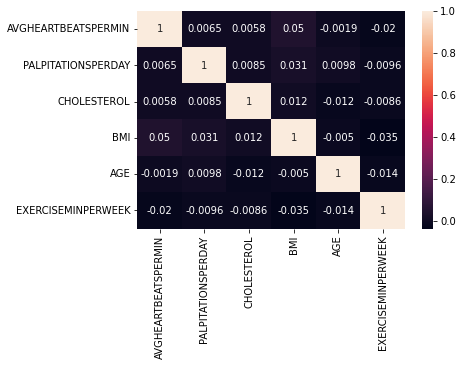

In [14]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

# Preparando codificadores das características categóricas

In [15]:
# Definindo codificadores
hf_encoder = LabelEncoder()
sex_encoder = LabelEncoder()
family_encoder = LabelEncoder()
smoker_encoder = LabelEncoder()

In [16]:
# Preparando codificadores para as variáveis categóricas
df.HEARTFAILURE = hf_encoder.fit_transform(df.HEARTFAILURE)
df.SEX = sex_encoder.fit_transform(df.SEX)
df.FAMILYHISTORY = family_encoder.fit_transform(df.FAMILYHISTORY)
df.SMOKERLAST5YRS = smoker_encoder.fit_transform(df.SMOKERLAST5YRS)

In [ ]:
# Salvando codificadores
joblib.dump(hf_encoder, 'hf_encoder.pkl')
joblib.dump(sex_encoder, 'sex_encoder.pkl')
joblib.dump(family_encoder, 'family_encoder.pkl')
joblib.dump(smoker_encoder, 'smoker_encoder.pkl')

['smoker_encoder.pkl']

In [17]:
df.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,93,22,163,25,0,49,0,0,0,110
1,108,22,181,24,0,32,0,0,0,192
2,86,0,239,20,0,60,0,0,0,121
3,80,36,164,31,1,45,0,1,0,141
4,66,36,185,23,0,39,0,0,0,63


In [ ]:
pd.to_pickle(df,'patientdataV6_enconder.pkl') #salvando dataframe após o encoder

In [ ]:
df_unpickled = pd.read_pickle('patientdataV6_enconder.pkl') #lendo dataframe após o encoder

In [ ]:
df_unpickled

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,93,22,163,25,0,49,0,0,0,110
1,108,22,181,24,0,32,0,0,0,192
2,86,0,239,20,0,60,0,0,0,121
3,80,36,164,31,1,45,0,1,0,141
4,66,36,185,23,0,39,0,0,0,63
...,...,...,...,...,...,...,...,...,...,...
10795,122,27,203,30,0,31,0,0,0,246
10796,67,15,186,25,0,54,0,0,0,189
10797,103,6,211,20,0,40,0,0,0,205
10798,99,30,152,27,0,32,1,0,0,211


# Separando o conjunto em variáveis preditoras (X) e variável alvo (y)

In [18]:
X = df.drop(['HEARTFAILURE'], axis=1).values
y = df.HEARTFAILURE.values

# Usando função de treinamento e avaliação para os diferentes algoritmos

0.7885802469135802
[[2312  386]
 [ 299  243]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      2698
           1       0.39      0.45      0.42       542

    accuracy                           0.79      3240
   macro avg       0.64      0.65      0.64      3240
weighted avg       0.80      0.79      0.79      3240



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


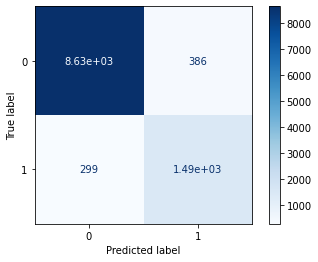

In [19]:
train_test_clf(DecisionTreeClassifier(), X, y) # Árvore de Decisão

0.870679012345679
[[2594  105]
 [ 314  227]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.89      0.96      0.93      2699
           1       0.68      0.42      0.52       541

    accuracy                           0.87      3240
   macro avg       0.79      0.69      0.72      3240
weighted avg       0.86      0.87      0.86      3240



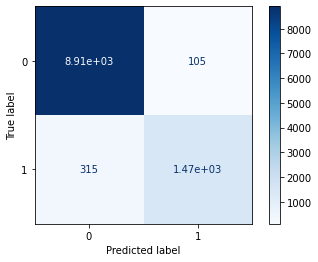

In [20]:
train_test_clf(RandomForestClassifier(), X, y) # Floresta Aleatória

0.8280864197530864
[[2618   98]
 [ 459   65]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2716
           1       0.40      0.12      0.19       524

    accuracy                           0.83      3240
   macro avg       0.62      0.54      0.55      3240
weighted avg       0.78      0.83      0.79      3240



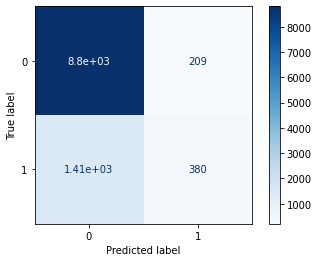

In [21]:
train_test_clf(KNeighborsClassifier(), X, y) # KNN

0.8330246913580247
[[2699    0]
 [ 541    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2699
           1       0.00      0.00      0.00       541

    accuracy                           0.83      3240
   macro avg       0.42      0.50      0.45      3240
weighted avg       0.69      0.83      0.76      3240



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


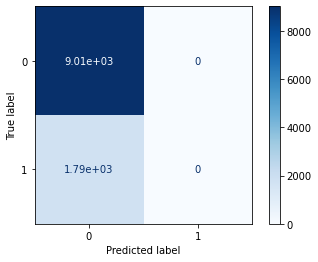

In [22]:
train_test_clf(SVC(), X, y) # SVM

0.8222222222222222
[[2359  342]
 [ 234  305]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2701
           1       0.47      0.57      0.51       539

    accuracy                           0.82      3240
   macro avg       0.69      0.72      0.70      3240
weighted avg       0.84      0.82      0.83      3240



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


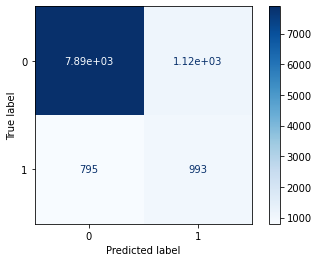

In [23]:
train_test_clf(GaussianNB(), X, y) # Naive Bayes

0.8570987654320987
[[2579  137]
 [ 326  198]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2716
           1       0.59      0.38      0.46       524

    accuracy                           0.86      3240
   macro avg       0.74      0.66      0.69      3240
weighted avg       0.84      0.86      0.84      3240



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


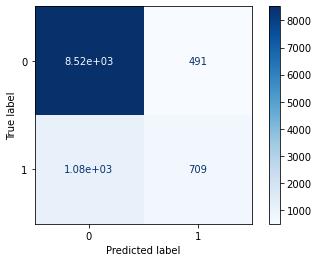

In [24]:
train_test_clf(MLPClassifier(), X, y) # Rede Neural Artificial

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.8530864197530864
[[2593  127]
 [ 349  171]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2720
           1       0.57      0.33      0.42       520

    accuracy                           0.85      3240
   macro avg       0.73      0.64      0.67      3240
weighted avg       0.83      0.85      0.84      3240



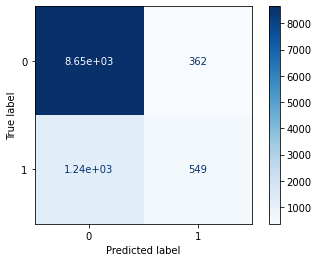

In [25]:
train_test_clf(LogisticRegression(), X, y) # Regressão Logística

# Salvando melhor classificador 

In [26]:
clf = RandomForestClassifier()
clf.fit(X, y)
joblib.dump(clf, 'rf.pkl')

['rf.pkl']

# Carregando classificador

In [ ]:
clf = joblib.load('rf.pkl', 'r')

In [27]:
print(clf.predict([[80,36,164,31,45,0,1,0,141]])) # 1 = HEARTFAILURE Y

[1]
